In [ ]:
!pip install scipy pandas numpy matplotlib scikit-learn fsspec huggingface_hub statsmodels

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
df = pd.read_csv("hf://datasets/hugginglearners/data-science-job-salaries/ds_salaries.csv")

In [ ]:
# 1. GENERAL SALARY DATA:

In [ ]:
df['salary_in_usd'].describe()

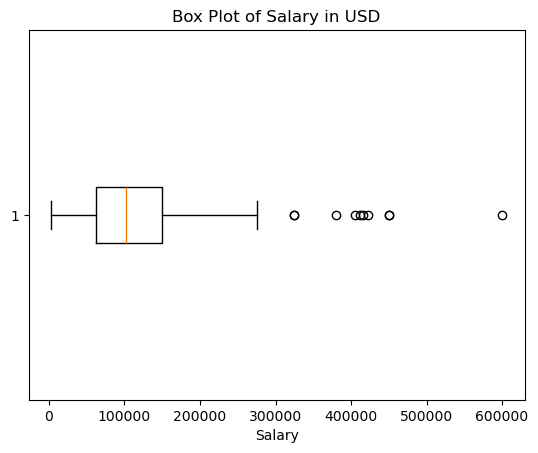

In [3]:
plt.boxplot(df['salary_in_usd'], vert=False)
plt.title('Box Plot of Salary in USD')
plt.xlabel('Salary')
plt.show()

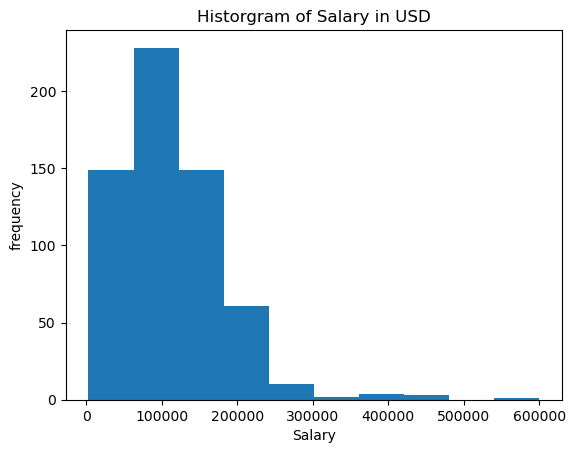

In [15]:
plt.hist(df['salary_in_usd'])
plt.title('Historgram of Salary in USD')
plt.xlabel('Salary')
plt.ylabel('frequency')
plt.show()

As seen in the Box Plot and Historam above, the mean is greater than the median. The visualizations show a tail on the left side meaning a right-skewed distribution and there is a single peak in the second bin of the histogram. It is easy in the box plot to see outliers to the left (outliers of very high salaries). The salaries in usd range from 2859 to 600000 with the the middle 50% of the salaries falling between 62726 (Q1) and 150000 (Q3).

In [ ]:
# 2 Effect of Experience on Salary

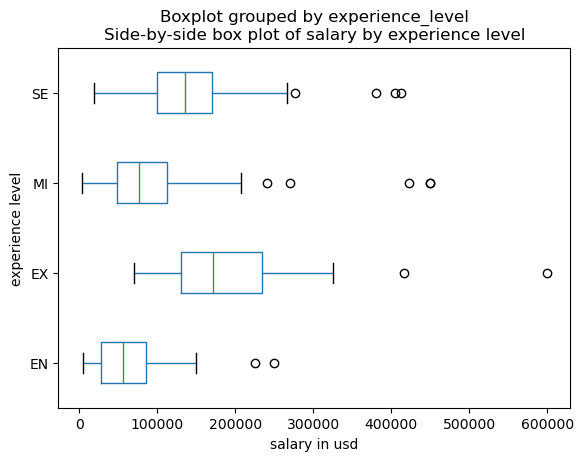

In [4]:
df.boxplot(column='salary_in_usd', by='experience_level', vert=False, grid=False)
plt.title('Side-by-side box plot of salary by experience level')
plt.xlabel('salary in usd')
plt.ylabel('experience level')
plt.show()

In [12]:
model = ols('salary_in_usd ~ C(experience_level)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq     df          F        PR(>F)
C(experience_level)  7.427705e+11    3.0  64.675515  2.881847e-36
Residual             2.308399e+12  603.0        NaN           NaN


In [5]:
mean_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].describe()
print(mean_salary_by_experience)

                  count           mean            std      min       25%  \
experience_level                                                           
EN                 88.0   61643.318182   44395.541126   4000.0   27505.0   
EX                 26.0  199392.038462  117071.255697  69741.0  130006.5   
MI                213.0   87996.056338   63901.057478   2859.0   48000.0   
SE                280.0  138617.292857   57691.978337  18907.0  100000.0   

                       50%        75%       max  
experience_level                                 
EN                 56500.0   85425.75  250000.0  
EX                171437.5  233750.00  600000.0  
MI                 76940.0  112000.00  450000.0  
SE                135500.0  170000.00  412000.0  


All experience levels have a few outliers of higher salary values. From the data, we see that EX level has the highest mean and median. The salaries for the EX level tend to be higher over all. The box plots show that even Q1 for the EX level is greater than Q3 for experience levels EN and MI. Comparing mean salary values from highest to lowest it goes: EX, SE, MI, and then EN. The salaries for those with EN experience tend to be the lowest as seen in the box plot by looking at the IQR being the smallest and having the lowest values. The data overall seems to be consistent for all experience levels that they are slightly skewed to the right, some experience levels more skewed than others. The mean for each experience level is higher than the median. Although still skewed to the right, the salaries for experience level of SE is most symmetric. From this data, we can conclude that their is a relationship between salary and experience level.

/var/folders/9x/4qztln3d1szdd5py9k83qs_r0000gn/T/ipykernel_96048/1113573724.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(salary_data, labels=sizes, patch_artist=True)


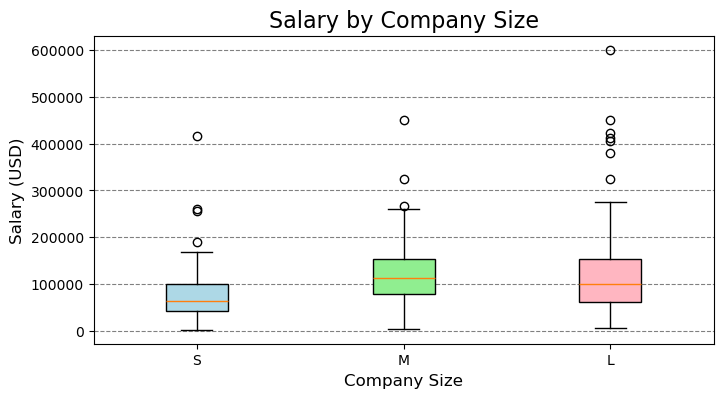

In [6]:
# 3 Impact of Company Size on Salary

sizes = ['S', 'M', 'L']
salary_data = [df[df['company_size'] == size]['salary_in_usd'] for size in sizes]

fig, ax = plt.subplots(figsize=(8, 4))

bp = ax.boxplot(salary_data, labels=sizes, patch_artist=True)

colors = ['lightblue', 'lightgreen', 'lightpink']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Salary by Company Size', fontsize=16)
ax.set_xlabel('Company Size', fontsize=12)
ax.set_ylabel('Salary (USD)', fontsize=12)

ax.yaxis.grid(True, linestyle='--', color='grey')

plt.show()

In [13]:
model = ols('salary_in_usd ~ C(company_size)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq     df          F    PR(>F)
C(company_size)  1.162105e+11    2.0  11.957777  0.000008
Residual         2.934959e+12  604.0        NaN       NaN


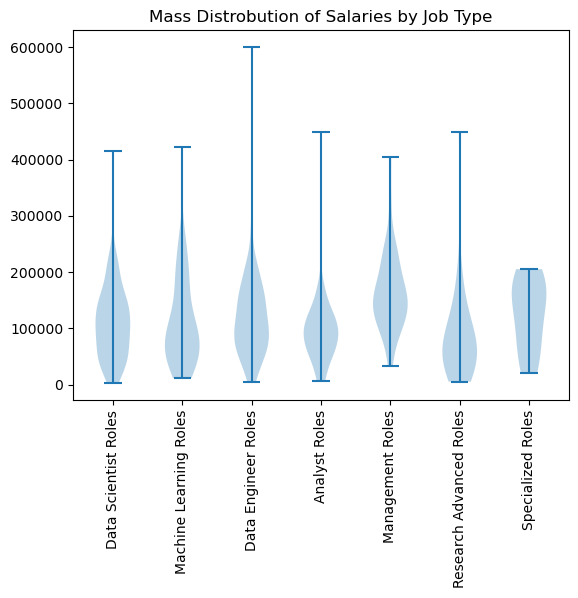

In [7]:
# 4 Job Title Analysis
job_df = df[['job_title', 'salary_in_usd']]


jobs = {}

jobs['Data Scientist Roles'] = ['Data Scientist', 'Principal Data Scientist', 'Staff Data Scientist', 'Applied Data Scientist', 'Data Science Engineer', 'Lead Data Scientist', 'Data Science Consultant']
jobs['Data Engineer Roles'] = ['Data Engineer', 'Lead Data Engineer', 'Principal Data Engineer', 'Big Data Engineer', 'Cloud Data Engineer', 'Data Engineering Manager', 'ETL Developer', 'Data Architect', 'Big Data Architect']
jobs['Machine Learning Roles'] = ['Machine Learning Engineer', 'Applied Machine Learning Scientist', 'ML Engineer', 'Machine Learning Scientist', 'Machine Learning Developer', 'Machine Learning Infrastructure Engineer', 'Lead Machine Learning Engineer', 'NLP Engineer', 'Machine Learning Manager', 'Head of Machine Learning']
jobs['Analyst Roles'] = ['Data Analyst','Principal Data Analyst','Finance Data Analyst', 'Business Data Analyst', 'BI Data Analyst', 'Lead Data Analyst', 'Financial Data Analyst', 'Product Data Analyst', 'Marketing Data Analyst']
jobs['Management Roles'] = ['Data Science Manager', 'Data Analytics Manager', 'Director of Data Science', 'Head of Data', 'Head of Data Science', 'Director of Data Engineering', 'Data Engineering Manager', 'Machine Learning Manager', 'Data Analytics Lead']
jobs['Research Advanced Roles'] = ['Research Scientist', 'AI Scientist', '3D Computer Vision Researcher', 'Computer Vision Engineer', 'Computer Vision Software Engineer']
jobs['Specialized Roles'] = ['Data Specialist', 'Data Analytics Engineer', 'Analytics Engineer', 'Financial Data Analyst']



# replace job titles with categories
flag = False
job_title = "none"
for row in job_df.itertuples():
    for key, value in jobs.items():
        job_title = row.job_title
        if row.job_title in value:
            job_df.at[row.Index, 'job_title'] = key
            break


# Group salaries by job titles
job_titles = job_df['job_title'].unique()
job_df = [job_df[job_df['job_title'] == title]['salary_in_usd'] for title in job_titles]
plt.violinplot(job_df)
plt.xticks(ticks=range(1, len(job_titles) + 1), labels=job_titles, rotation=90)
plt.title('Mass Distrobution of Salaries by Job Type')
plt.show()

In [14]:
model = ols('salary_in_usd ~ C(job_title)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                    sum_sq     df         F        PR(>F)
C(job_title)  7.660926e+11   49.0  3.811006  6.894563e-15
Residual      2.285077e+12  557.0       NaN           NaN


In [8]:
# 5 Interactions Between Relationships
df_5 = df
df_5['salary_in_usd'] = pd.to_numeric(df_5['salary_in_usd'], errors='coerce')
df_5 = df_5.dropna(subset=['job_title', 'company_size', 'salary_in_usd'])

pivot_table = pd.pivot_table(df_5, 
                             values='salary_in_usd', 
                             index='job_title', 
                             columns='company_size', 
                             aggfunc='mean')

pivot_table = pivot_table.round(-3)
pivot_table['mean'] = pivot_table.mean(axis=1)
pivot_table = pivot_table.sort_values('mean', ascending=False)
pivot_table = pivot_table.drop('mean', axis=1)
print(pivot_table.head(23).to_string())

summary_stats = df.groupby('company_size')['salary_in_usd'].agg(['mean', 'median', 'std', 'count'])
summary_stats = summary_stats.round(0)

print("\nSummary Statistics by Company Size:")
print(summary_stats.to_string())

exp_summary = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean().unstack()
exp_summary = exp_summary.round(-3)

print("\nMean Salary by Experience Level and Company Size:")
print(exp_summary.to_string())

company_size                               L         M         S
job_title                                                       
Data Analytics Lead                 405000.0       NaN       NaN
Principal Data Engineer             392000.0  200000.0       NaN
Financial Data Analyst              275000.0       NaN       NaN
Principal Data Scientist            202000.0  162000.0  416000.0
Applied Data Scientist              176000.0       NaN       NaN
Analytics Engineer                       NaN  175000.0       NaN
Data Architect                      167000.0  182000.0       NaN
Director of Data Science            213000.0  130000.0  168000.0
Data Specialist                     165000.0       NaN       NaN
Data Science Manager                143000.0  174000.0       NaN
Director of Data Engineering        200000.0  113000.0       NaN
Lead Data Engineer                  276000.0   56000.0  127000.0
Machine Learning Scientist          181000.0   82000.0  190000.0
Applied Machine Learning 

# 6 Summary
The significant relationships that we found were between experience and salary, company size and salary, and job title and salary.